In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df  = pd.read_excel("tensile.xlsx", skiprows = [1])


In [6]:
print("Full data preview:")
print(df.head())
print(df.columns)

Full data preview:
   Tensile strain (Strain 1)  Tensile stress
0                    0.00002         1.43967
1                    0.00003         2.52662
2                    0.00004         3.67683
3                    0.00006         5.29496
4                    0.00007         6.70055
Index(['Tensile strain (Strain 1)', 'Tensile stress'], dtype='object')


In [7]:
df = df.rename(columns={"Tensile strain (Strain 1)": "Strain", "Tensile stress": "Stress"})
print(df.columns)

Index(['Strain', 'Stress'], dtype='object')


In [8]:
elastic_limit = 0.002   # 0.2% strain
elastic_df = df[df["Strain"] <= elastic_limit]

print("Elastic region preview:")
print(elastic_df.head())



Elastic region preview:
    Strain   Stress
0  0.00002  1.43967
1  0.00003  2.52662
2  0.00004  3.67683
3  0.00006  5.29496
4  0.00007  6.70055


In [10]:
X = np.array(elastic_df["Strain"]).reshape(-1,1)
y = np.array(elastic_df["Stress"])

In [11]:
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]       # Young’s modulus
intercept = model.intercept_

print(f"Young's Modulus (E) ≈ {slope:.2f} MPa")
print(f"Intercept ≈ {intercept:.2f}")


Young's Modulus (E) ≈ 93523.54 MPa
Intercept ≈ -0.36


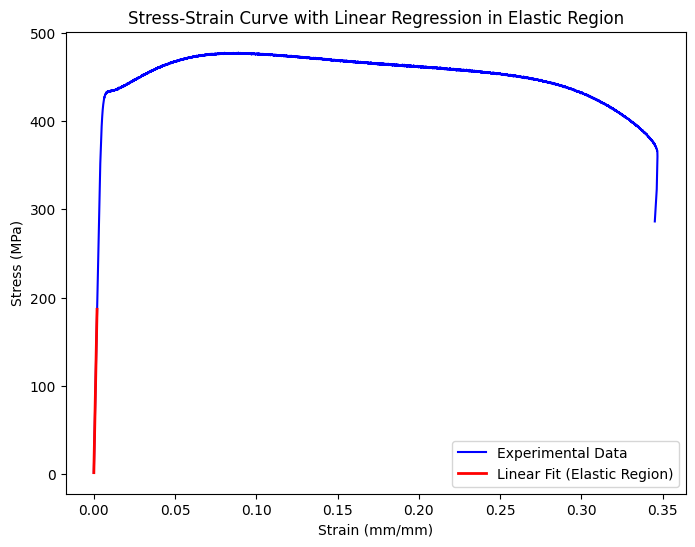

In [12]:

y_pred = model.predict(X)

plt.figure(figsize=(8,6))
plt.plot(df["Strain"], df["Stress"], 'b-', label="Experimental Data")
plt.plot(X, y_pred, 'r-', linewidth=2, label="Linear Fit (Elastic Region)")
plt.xlabel("Strain (mm/mm)")
plt.ylabel("Stress (MPa)")
plt.legend()
plt.title("Stress-Strain Curve with Linear Regression in Elastic Region")
plt.show()
